##  Фінальний проект 
### Рижкін Юрій

Провести одне обстеження тієї кількості домогосподарств Статвіліджа (Maximal village - 128 blocks), що ви отримали в п. 2 Лаб.роботи № 1 за допомогою ПВВбП. (можна працювати із тією ж самою вибіркою, що була отримана в п. 3 Лаб.роботи №1). Для змінних та параметрів із лаб.роботи №1:
- сумарне — одна змінна y(1)k,  вважається відомою лише для елементів із вибірки, та невідомою для всіх інших елементів генеральної сукупності;
- середнє – інша змінна y(2)k, вважається відомою лише для елементів із вибірки, та невідомою для всіх інших елементів генеральної сукупності;
- пропорцію (частка) — ще одна дихотомічна змінна y(3)k, вважається відомою лише для елементів із вибірки, та невідомою для всіх інших елементів генеральної сукупності

Виберемо для : 
1. Сумарного NUEMPINH Number of Employment Income Recipients in Household
2. Середнього VALUEH Value of Dwelling
3. Пропорції SHMSEX Sex of Spouse or Common-Law Partner of Primary Household M = 2

In [17]:
library(dplyr)
file = read.table('StatVillage.raw', colClasses = c("V4"="character"))
names = c('BLOCK', 'UNIT', 'HHSIZE', 'HHPER', 'NUEMPINH', 'NUIRH', 'EMPINCH', 'INVSTH', 'GOVINCH', 'OTINCH', 'TOTINCH', 'DTYPEH', 'BUILTH', 'TENURH', 'MORGH', 'ROOMH', 'BROOMH', 'VALUEH', 'GROSRTH', 'OMPH', 'HMAGE', 'HMSEX', 'HMMTN', 'HMHLOS', 'HMOCC91', 'HMLFACT', 'HMWKSWK', 'HMEMPIN', 'SHMAGE', 'SHMSEX', 'SHMMTN', 'SHMHLOS', 'SHMOCC91', 'SHMLFACT', 'SHMWKSW', 'SHMEMPIN')
colnames(file) = names

In [18]:
n <- 277
N <- 1024
set.seed(0)
x <- sample(1:1024,n)
data <- file[x,c('NUEMPINH','VALUEH','SHMSEX','NUIRH','HMSEX')]
head(data)

,NUEMPINH,VALUEH,SHMSEX,NUIRH,HMSEX
,<int>,<chr>,<chr>,<int>,<int>
398,1,190000,2,2,1
1017,0,225000,2,2,1
836,0,200000,2,2,1
679,1,442000,2,2,1
129,4,250000,2,4,1
930,1,.,.,1,1


Заповнимо пробіли даних

In [19]:
for (i in 1:n){
    if (data[i,'VALUEH'] == '.'){ data[i,'VALUEH'] = data[i-1,'VALUEH']}
    if (data[i,'SHMSEX'] == '.'){ data[i,'SHMSEX'] = data[i-1,'SHMSEX']}
    if (data[i,'NUIRH'] == '.'){ data[i,'NUIRH'] = data[i-1,'NUIRH']}
}

### Завдання 1 - 4 бали
Виписати оцінки параметрів із п. 1-3 за допомогою оцінки Г-Т разом із оцінками для їх дисперсій. Визначитись із допоміжними змінними, що пов'язані із тими, що ви досліджуєте. 

In [20]:
# 1,2,3
print(sum(data[,'NUEMPINH'])/n*N)
data[,'VALUEH'] = as.integer(data[,'VALUEH'])
print(mean(data[,'VALUEH']))
print(length(filter(data,SHMSEX == '2')[,'SHMSEX'])/length(data[,'SHMSEX']))

[1] 1707.899
[1] 236971.1
[1] 0.8916968


In [21]:
# Дисперсії
#
f <- n/N
print(N*N*(1-f)/n*var(data[,'NUEMPINH']))
print((1-f)/n*var(data[,'VALUEH']))
print(n/(n-1)*var(data[,'SHMSEX'])*(1-var(data[,'SHMSEX'])))

[1] 3916.529
[1] 30026275
[1] 0.08784652


1. Сумарного NUEMPINH = 1707.899
2. Середнього VALUEH  = 236971.1
3. Пропорції SHMSEX=2: 0.8916968

Дисперсії:
1. Сумарного NUEMPINH = 3916.529
2. Середнього VALUEH  = 30026275
3. Пропорції SHMSEX=2: 0.08784652

Виберемо допоміжні змінні
1. Сумарного NUEMPINH - NUIRH 
2. Середнього VALUEH - NUEMPINH
3. Пропорції HMSEX

### Завдання 2 - 12 балів
Оцінити параметри із п. 1-3 за допомогою оцінювання за відношенням вибравши для цього допоміжну змінну(чи декілька змінних)  xk,  що  буде вважатись відомою для всіх без винятку елементів г.с (домогосподарств Статвіліджа). Для різних змінних можна вибирати різні  допоміжні змінні (хоча і не обов’язково), враховуючи, що вони повинні бути пов’язані із змінною, що досліджується. Порахувати оцінки дисперсій для оцінок за відношенням для цих трьох параметрів різними способами. Наприклад, оцінку для дисперсії сумарного оцінити методом лінеаризації Тейлора, для середнього - методом Джек-найф, для пропорції - методом Бут-стреп.

In [22]:

# Сумарного NUEMPINH
T_z_sum <- sum(file[,'NUIRH'])
t_y_sum <- sum(data[,'NUEMPINH'])
t_z_sum <- sum(data[,'NUIRH'])
cat('Сумарного NUEMPINH: ',t_y_sum/t_z_sum*T_z_sum)

#Середнього VALUEH

T_z_sum <- mean(file[,'NUEMPINH'])
t_y_sum <- mean(data[,'VALUEH'])
t_z_sum <- mean(data[,'NUEMPINH'])
cat('\nСереднього VALUEH: ',t_y_sum/t_z_sum*T_z_sum)

#Пропорції

T_z_sum <- length(filter(file,HMSEX == '2')[,'HMSEX'])/length(file[,'HMSEX'])
t_y_sum <- length(filter(data,SHMSEX == '2')[,'SHMSEX'])/length(data[,'SHMSEX'])
t_z_sum <- length(filter(data,HMSEX == '2')[,'HMSEX'])/length(data[,'HMSEX'])
cat('\nПропорції HMSEX: ',t_y_sum/t_z_sum*T_z_sum)

Сумарного NUEMPINH:  1732.1
Середнього VALUEH:  239760.1
Пропорції HMSEX:  0.8532837

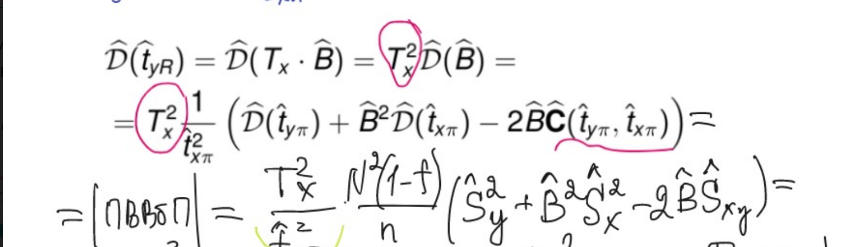

In [23]:
# Для сумарного 
T_x<- sum(file[,'NUIRH'])

t_x <- sum(data[,'NUIRH'])
N <- 1024
n <- 277
f <- n/N
Sy <- var(data[,'NUEMPINH'])
t_y_sum <- sum(data[,'NUEMPINH'])
t_x_sum <- sum(data[,'NUIRH'])
B <- t_y_sum/t_x_sum
sx <- var(data[,'NUIRH'])
Sxy <- cov(data[,'NUIRH'],data[,'NUEMPINH'])

vari <- T_x^2*N^2*(1-f)/n*(Sy+B*B*sx-2*B*Sxy)/(t_x*t_x)
vari

[1] 18383.22

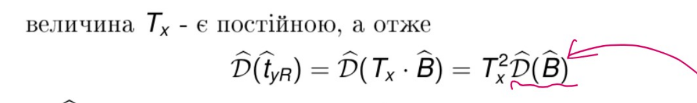

In [24]:
# для середнього

T_z_sum <- mean(file[,'NUEMPINH'])
t_y_sum <- sum(data[,'VALUEH'])
t_z_sum <- sum(data[,'NUEMPINH'])

n <- 1024/4
sigma <- mean(data[,'VALUEH'])
y_sum <- t_y_sum
z_sum <- t_z_sum
var_jk2 <-0

for (i in 1:nrow(data)){
    sigma_j <- (y_sum-data[i,'VALUEH'])/(z_sum-data[i,'NUEMPINH'])
    var_jk2 = var_jk2 + (sigma_j-sigma)^2
    
}
var_jk2 = var_jk2/n*(n-1) * T_z_sum*T_z_sum
var_jk2


[1] 7.074858e+12

In [25]:
# для пропорції 

x <- sample(1:277,16)
data_boot <- data[x,]
for(i in 1:63){
    x <- sample(1:256,16)
    data_boot <- rbind(data_boot,data[x,])
}


number <- 4
boot_list <- list()
for (i in 1:number){
    x <- sample(1:1024,256) 
    calculate_data <- data_boot[x,]
    app = length(filter(calculate_data,SHMSEX == '2')[,'SHMSEX'])/length(calculate_data[,'SHMSEX'])
    boot_list[i] <- app
}
boot_list2 <- unlist(boot_list, use.names=FALSE)
sigma_mean <- mean(boot_list2)
var_sigma <- var(boot_list2)
print(sigma_mean)
print(var_sigma)



[1] 0.9072266
[1] 0.0007769267


### Завдання 3 - 12 балів
Оцінити параметри із п. 1-3 за допомогою оцінювання за лінійною регресією взявши для цього ту ж саму допоміжну змінну(ні)  xk, що і в п. 2),  що  буде вважатись відомою для всіх без винятку елементів г.с.  Порахувати оцінки дисперсій для оцінок за лінійнійною регресією для цих трьох параметрів тими ж методами, що і в п. 2). 


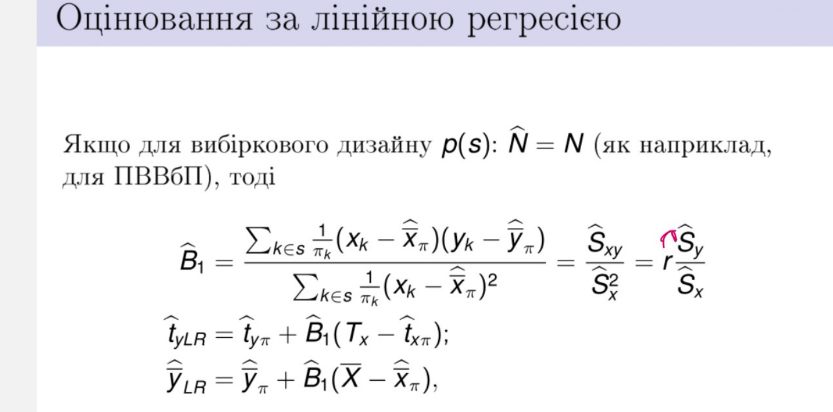

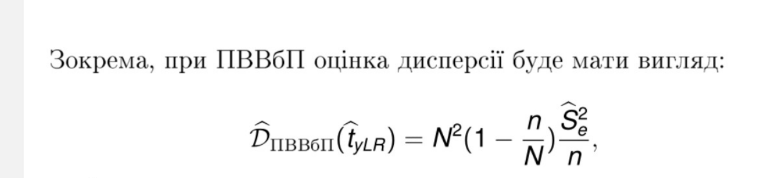

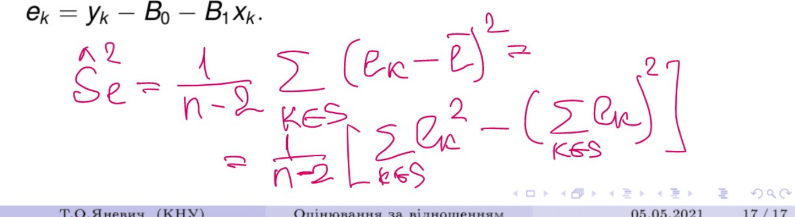

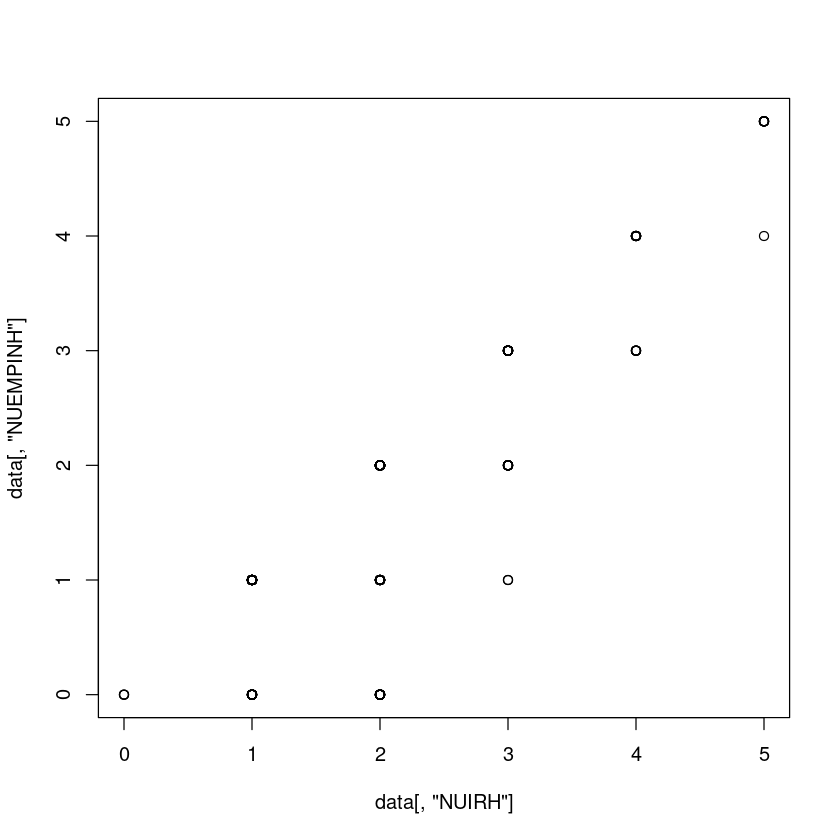

In [26]:
# Сумарного NUEMPINH
plot(data[,'NUIRH'],data[,'NUEMPINH'])

In [27]:

#Сумарного NUEMPINH
n <- 277
N <- 1024
T_z_sum <- sum(file[,'NUIRH'])
t_y_sum <- sum(data[,'NUEMPINH'])/n*N
t_z_sum <- sum(data[,'NUIRH'])/n*N

sxy <- cor(data[,'NUIRH'],data[,'NUEMPINH'])
sx <- var(data[,'NUIRH'])
b1 <- sxy/sx


T_z_sum <- sum(file[,'NUIRH'])

y_lin_sum <- t_y_sum + b1*(T_z_sum-t_z_sum)
resi <- data[,'NUEMPINH'] - b1*data[,'NUIRH']
print(y_lin_sum)
var_res <- 0
for (i in 1:n){
    var_res = var_res + resi[i]^2
}
for (i in 1:n){
         
}
var_res = var_res/(n-2)*N*N*(1-n/N)
print(var_res)


[1] 1733.708
[1] 358855.7


In [28]:
# Середнього  VALUEH

T_z_sum <- mean(file[,'NUEMPINH'])
t_y_sum <- mean(data[,'VALUEH'])
t_z_sum <- mean(data[,'NUEMPINH'])

sxy <- cor(data[,'VALUEH'],data[,'NUEMPINH'])
sx <- var(data[,'VALUEH'])
b1 <- sxy/sx


T_z_sum <- sum(file[,'NUIRH'])


y_lin_mean <- t_y_sum + b1*(T_z_sum-t_z_sum)
print(y_lin_mean)

# Дисперсія JK
resi <- data[,'NUEMPINH'] - b1*data[,'VALUEH']

var_res <- 0
for (i in 1:n){
    var_res = var_res + resi[i]^2
}

print(var_res/(n-2))

[1] 236971.1
[1] 4.22544


In [29]:
# Пропорції HMSEX

T_z_sum <- length(filter(file,HMSEX == '2')[,'HMSEX'])/length(file[,'HMSEX'])
t_y_sum <- length(filter(data,SHMSEX == '2')[,'SHMSEX'])/length(data[,'SHMSEX'])
t_z_sum <- length(filter(data,HMSEX == '2')[,'HMSEX'])/length(data[,'HMSEX'])

sx <- var(data[,'HMSEX'])
data[,'HMSEX'] = as.numeric(data[,'HMSEX'])
data[,'SHMSEX'] = as.numeric(data[,'SHMSEX'])

sxy <- cor(data[,'HMSEX'],data[,'SHMSEX'])


b1 <- sxy/sx
0


y_lin_prop <- t_y_sum + b1*(T_z_sum-t_z_sum)
print(y_lin_prop)
000ju


[1] 0.9216096


### Завдання 4 - 7 балів 
Проаналізувати отримані результати — коли та чому ви отримали найкращий результат? (Бажано зібрати всі результати в одній таблиці).  Які будуть ваші рекомендації? 


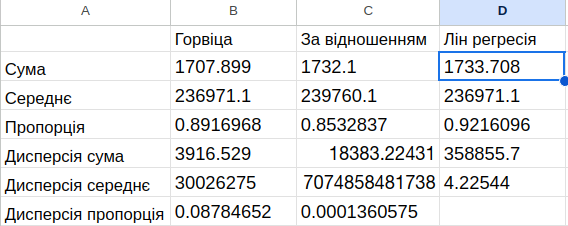

Як на мене краще за все показала себе оцінка Горвіца, адже у нас +- адекватні дисперсії та оцінки значень. Адже у випадку оцінки за відношенням якісь дуже великі дисперсії для суми та середього. І дуже малі для пропорцій. Аналогічно за лінійною регресії. 

Мої рекомендації - це впершу чергу передивитись формули, які я використовував для обчислення дисперсії, а також передивитись розмір вибірки, яку я розрахував в першій лабораторній

### Завдання 5 - 5 балів 
Які висновки ви зробили стосовно тієї проблеми, що ви з самого початку збирались вирішувати? Зробіть практичні висновки. Чи змінилось ваше рішення порівняно із результатами Лабораторної роботи № 1?

На мою думку розширення способів розрахунки краще вплинуло на точність наших розрахункі, зокрема оцінка за регресією повинні краще розраховувати наші оцінки.
Порівняно з першою лабораторною роботою рішення не змінив